In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("C:/Users/navji/Downloads/Projects/housing.csv")
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
#applying dummies to get the new binary columns based on the categorical column
dummies = pd.get_dummies(df['ocean_proximity'])
dummies = dummies.astype(int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['ocean_proximity'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [4]:
df.info()
#df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   <1H OCEAN           20640 non-null  int32  
 10  INLAND              20640 non-null  int32  
 11  ISLAND              20640 non-null  int32  
 12  NEAR BAY            20640 non-null  int32  
 13  NEAR OCEAN          20640 non-null  int32  
dtypes: float64(4), int32(5), int64(5)
memory usage: 1.8 MB


In [5]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['median_house_value'], axis=1)
y = df['median_house_value']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
train = x_train.join(y_train)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 20272 to 4171
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  int64  
 3   total_rooms         16346 non-null  int64  
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  int64  
 6   households          16346 non-null  int64  
 7   median_income       16346 non-null  float64
 8   <1H OCEAN           16346 non-null  int32  
 9   INLAND              16346 non-null  int32  
 10  ISLAND              16346 non-null  int32  
 11  NEAR BAY            16346 non-null  int32  
 12  NEAR OCEAN          16346 non-null  int32  
 13  median_house_value  16346 non-null  int64  
dtypes: float64(4), int32(5), int64(5)
memory usage: 2.1 MB


In [8]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
20272,-119.23,34.19,16,5297,810.0,1489,667,6.4522,0,0,0,0,1,500001
16607,-120.63,35.59,9,5782,1184.0,3026,1130,2.6528,1,0,0,0,0,113500
551,-122.26,37.77,52,1704,371.0,663,340,4.2260,0,0,0,1,0,275000
2666,-115.52,33.13,18,1109,283.0,1006,253,2.1630,0,1,0,0,0,53400
4672,-118.29,34.05,31,2818,1252.0,4126,1200,2.0530,1,0,0,0,0,229200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,-118.40,34.13,32,8262,1156.0,2712,1125,10.5575,1,0,0,0,0,500001
5684,-118.28,33.68,8,2842,522.0,1624,510,3.7282,0,0,0,0,1,287500
13310,-117.61,34.09,11,2000,391.0,1503,426,4.6167,0,1,0,0,0,144000
10506,-117.68,33.55,5,2262,427.0,1016,402,6.0650,1,0,0,0,0,315500


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

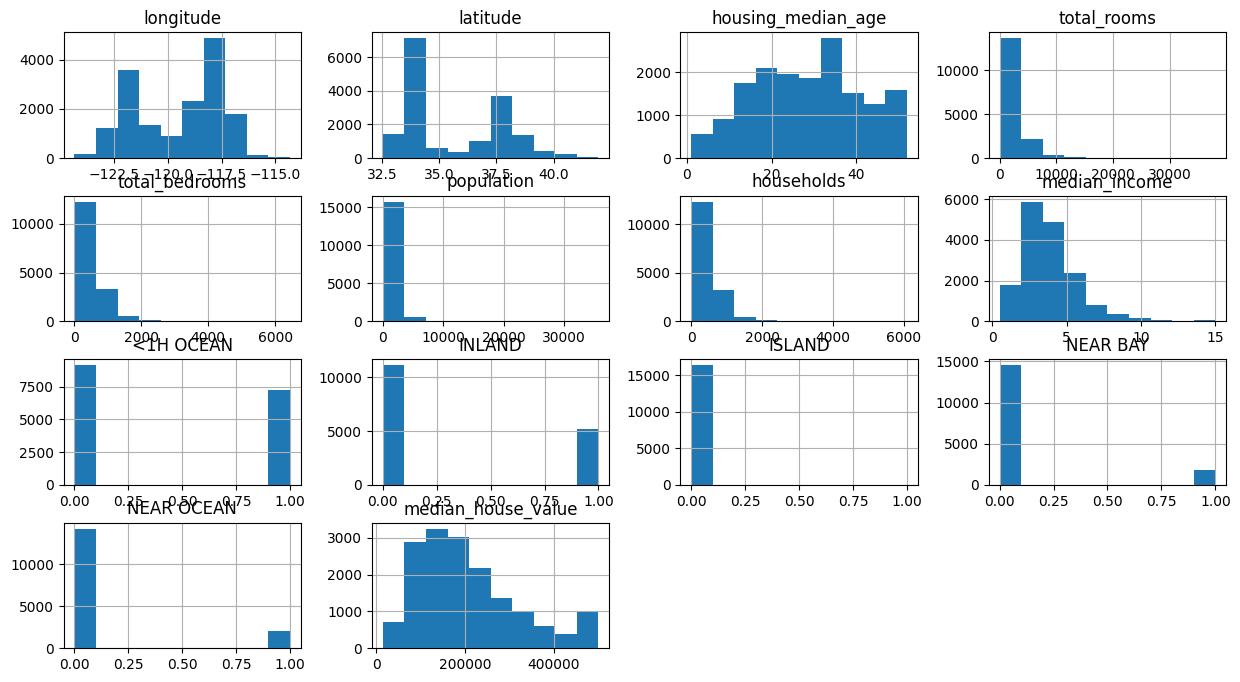

In [9]:
train.hist(figsize=(15, 8))
#THIS IS IMPORTANT TO UNDERSTAND IF ALL DATA VALUES ARE SKEWED OR NOT

<Axes: >

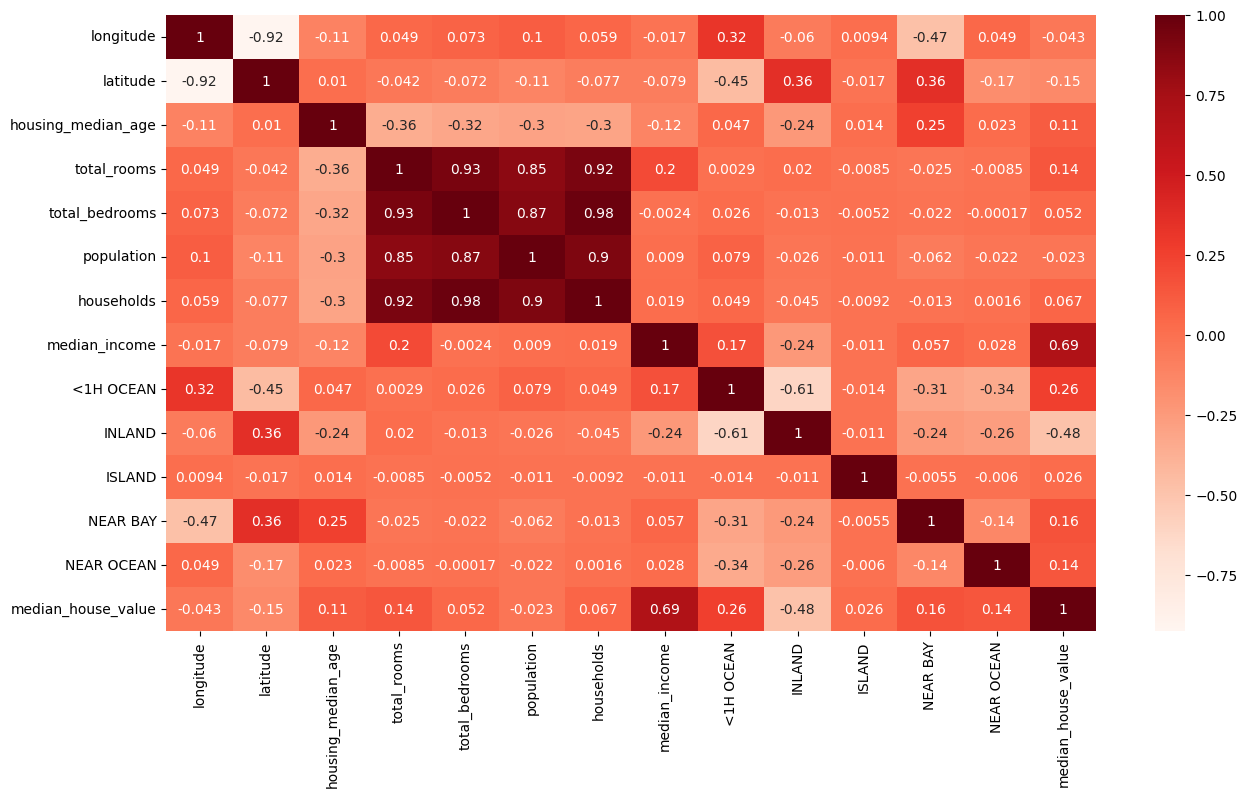

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True, cmap="Reds")

In [11]:
#Here we are adding a constant of 1 to reduce right skew(data is all the way on the left)
#By applying np.log(logarithm) this reduces the skew of data to all columns and makes it more gaussian
train['total_rooms'] = np.log(train['total_rooms'] + 1)
train['total_bedrooms'] = np.log(train['total_bedrooms'] + 1)
train['population'] = np.log(train['population'] + 1)
train['households'] = np.log(train['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

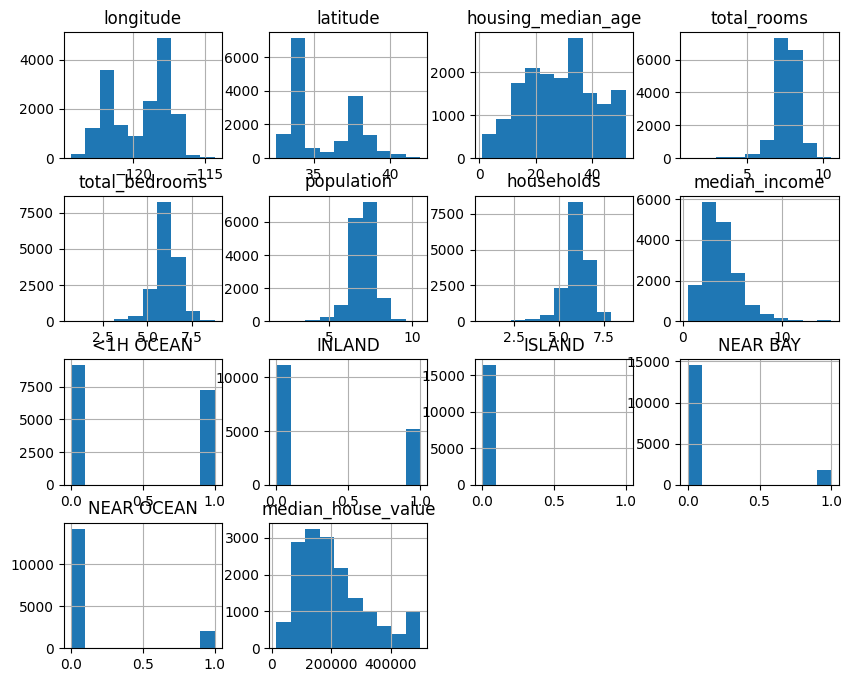

In [12]:
train.hist(figsize=(10, 8))

<Axes: xlabel='latitude', ylabel='longitude'>

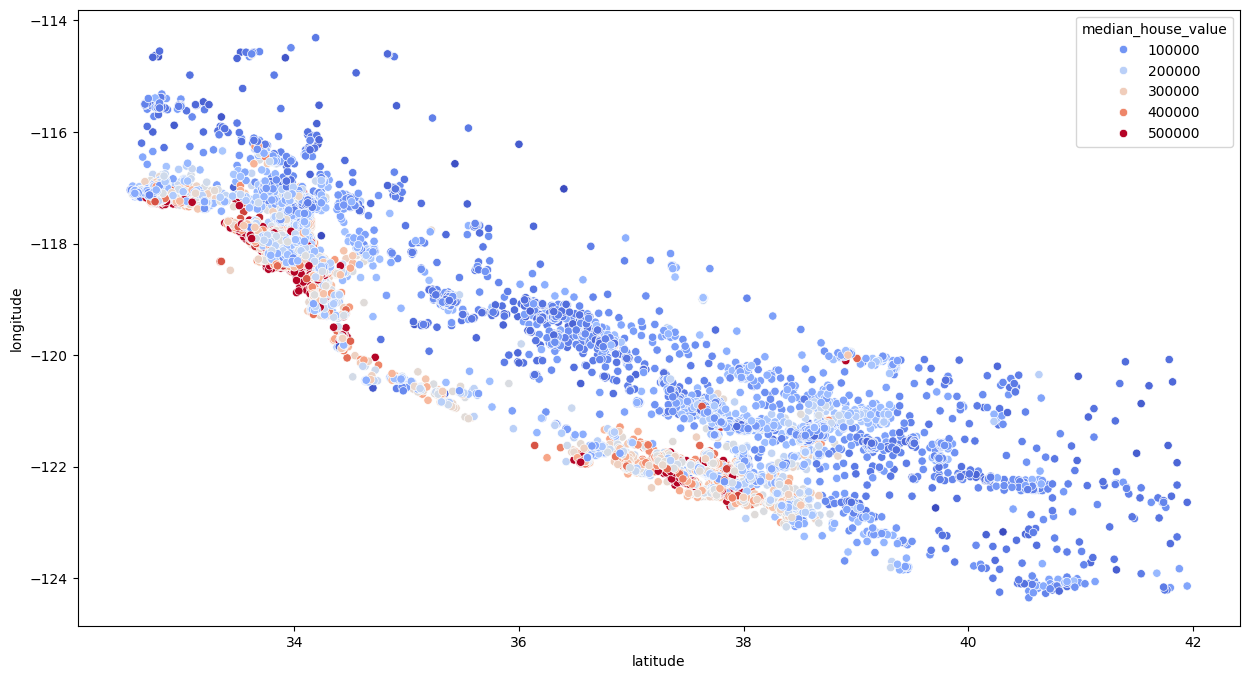

In [13]:
# SCATTERPLOT
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train, hue="median_house_value", palette="coolwarm")

In [14]:
# FEATURE ENGINEERING (CREATING OR REDUCING DIMENSIONALITY)
train['bedroom_ratio'] = train['total_bedrooms'] / train['total_rooms']
train['household_rooms'] = train['total_rooms'] / train['households']

<Axes: >

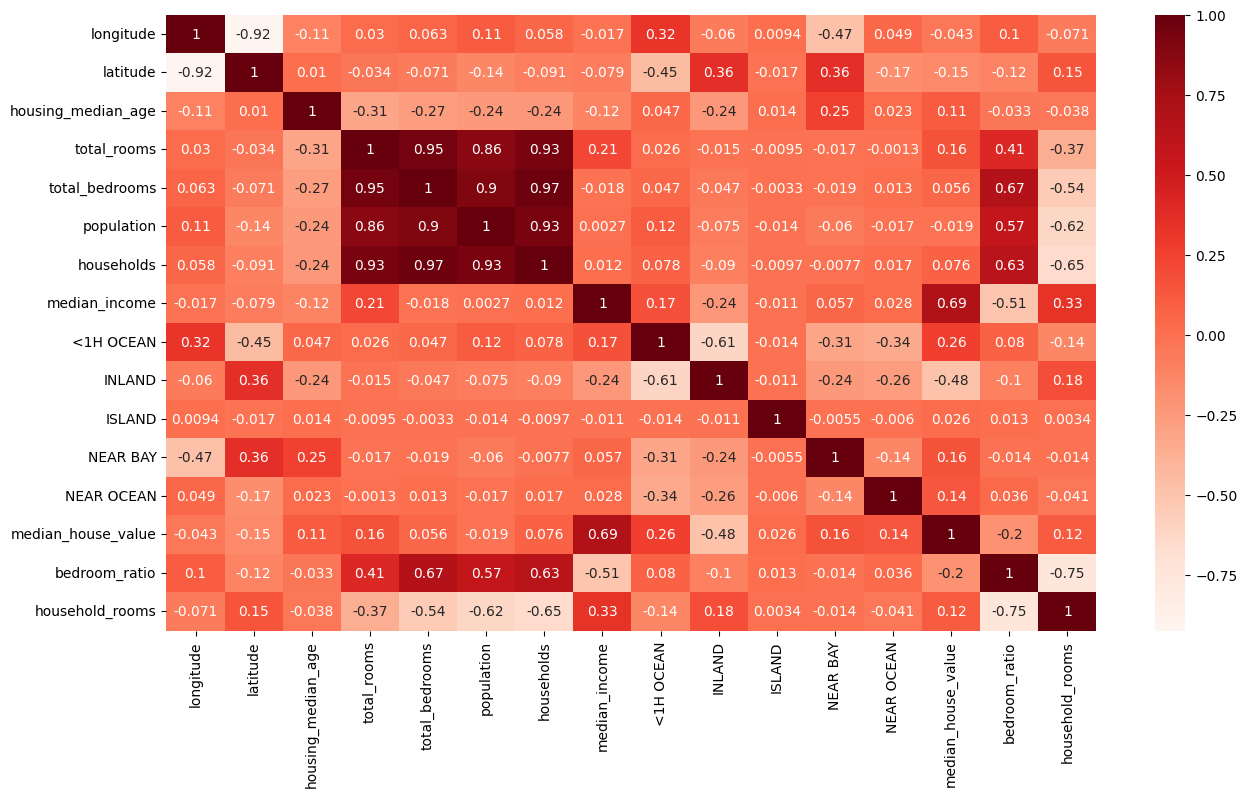

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True, cmap="Reds")

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#x then y value

scaler = StandardScaler()

x_train, y_train = train.drop(['median_house_value'], axis=1), train['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train, y_train)




LinearRegression()

In [17]:
test = x_test.join(y_test)

test['total_rooms'] = np.log(test['total_rooms'] + 1)
test['total_bedrooms'] = np.log(test['total_bedrooms'] + 1)
test['population'] = np.log(test['population'] + 1)
test['households'] = np.log(test['households'] + 1)

test['bedroom_ratio'] = test['total_bedrooms'] / test['total_rooms']
test['household_rooms'] = test['total_rooms'] / test['households']



In [18]:
x_test, y_test = test.drop(['median_house_value'], axis=1), test['median_house_value']

In [ ]:
x_test_s = scaler.transform(x_test)

In [19]:
test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value,bedroom_ratio,household_rooms
10313,-117.80,33.85,23,8.019284,6.154858,7.358194,6.084499,5.6403,1,0,0,0,0,233000,0.767507,1.317986
8844,-118.39,34.09,28,7.761319,6.411818,6.666957,6.308098,4.4167,1,0,0,0,0,425000,0.826125,1.230374
4109,-118.39,34.14,34,8.439232,6.661855,7.360740,6.579251,6.5533,1,0,0,0,0,500001,0.789391,1.282704
15642,-122.42,37.80,52,7.483244,6.188264,6.838405,6.059123,3.3643,0,0,0,1,0,420000,0.826949,1.235038
15651,-122.41,37.79,52,7.741968,6.844815,7.323831,6.759255,1.3668,0,0,0,1,0,55000,0.884118,1.145388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,-118.44,34.18,35,6.880384,5.602119,6.311735,5.549076,2.2461,1,0,0,0,0,215000,0.814216,1.239915
19228,-122.66,38.48,16,7.900266,6.196444,7.288244,6.246107,4.2051,1,0,0,0,0,190300,0.784334,1.264830
9518,-123.19,39.15,16,7.854769,6.206576,7.117206,6.192362,2.6012,1,0,0,0,0,125600,0.790167,1.268461
15556,-117.07,33.12,21,8.429236,6.833032,7.944137,6.803505,3.1458,1,0,0,0,0,187700,0.810635,1.238955


In [20]:
reg.score(x_test, y_test)

0.676910144956004

In [ ]:
#Scalar
